In [2]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

#from util import inside_poly, mkpol, angular_separation
from scipy import interpolate


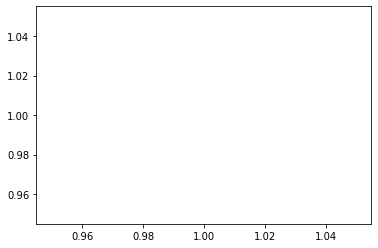

In [3]:
plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.show()

In [4]:
tester = "/Users/users/spirov/PopProject/"


df = vaex.open(tester+"poege5_10kpc_ebvle0.2_Gle16_wJPLUSandJKC.hdf5")

In [5]:
for a in df.get_names():
    print(a)

source_id
ra
dec
parallax
parallax_error
pmra
pmra_error
pmdec
pmdec_error
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_matched_transits
visibility_periods_used
ruwe
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_n_obs
phot_rp_mean_flux
phot_rp_mean_flux_error
phot_rp_mean_mag
radial_velocity
radial_velocity_error
rv_template_teff
rv_template_logg
rv_template_fe_h
rv_atm_param_origin
l
b
non_single_star
parallax_corr
parallax_corr_error
Gaia2_mag_C1B431
Gaia2_mag_C1B556
Gaia2_mag_C1B655
Gaia2_mag_C1B768
Gaia2_mag_C1B916
Gaia2_mag_C1M326
Gaia2_mag_C1M344
Gaia2_mag_C1M379
Gaia2_mag_C1M395
Gaia2_mag_C1M410
Gaia2_mag_C1M467
Gaia2_mag_C1M506
Gaia2_mag_C1M515
Gaia2_mag_C1M549
Gaia2_mag_C1M656
Gaia2_mag_C1M716
Gaia2_mag_C1M747
Gaia2_mag_C1M825
Gaia2_mag_C1M861
Gaia2_mag_C1M965
Gaia2_flux_C1B

# Standard Parameters

In [6]:
zRange = 0.1
zPoint = -1.54


cut = (df.mh_xgboost>zPoint-0.5*zRange)*(df.mh_xgboost<zPoint+0.5*zRange)



subFrame = df[cut]

#subFrame = subFrame.join(dataFrame,on="source_id",how="inner",rsuffix="o_")

subFrame["Jkc_b_cleansed"] = subFrame.Jkc_mag_B - 3.1*subFrame.ebv*1.32616
subFrame["Jkc_v_cleansed"] = subFrame.Jkc_mag_V   - 3.1*subFrame.ebv*0.99575



subFrame["B-V"] = subFrame.Jkc_b_cleansed-subFrame.Jkc_v_cleansed


BV = subFrame["B-V"]
mG = subFrame.phot_g_mean_mag


dM = -5*np.log10(subFrame.distance)
M = mG+5+dM
subFrame["Mag"] =M

# JpasColor

In [41]:
corrFlux = 10**(-51.1/2.5)
AfAv = 1.54
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_u_corr = fi*subFrame.Jpas_flux_u/corrFlux


AfAv = 1.44
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_400_corr = fi*subFrame.Jpas_flux_J0400/corrFlux

AfAv = 1.4
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*subFrame.Jpas_flux_J0410/corrFlux


JpasHigh = Jpas_flux_400_corr + Jpas_flux_u_corr+Jpas_flux_410_corr

#-------------------------
AfAv = 1.36
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_420_corr = fi*subFrame.Jpas_flux_J0420/corrFlux

AfAv = 1.4
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*subFrame.Jpas_flux_J0410/corrFlux

JpasMid = Jpas_flux_410_corr+Jpas_flux_420_corr

AfAv = 1.33
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_430_corr = fi*subFrame.Jpas_flux_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_SDDS_corr = fi*subFrame.Jpas_flux_iSDSS/corrFlux

#--------------------------
subFrame["JfSSDS"] = Jpas_flux_SDDS_corr
subFrame["Jf430"] = Jpas_flux_430_corr
subFrame["Jf410"] = Jpas_flux_410_corr
subFrame["Jf400"] = Jpas_flux_400_corr
subFrame["Jfu"] = Jpas_flux_u_corr


In [42]:
corrFlux = 10**(-51.1/2.5)
AfAv = 1.54
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_u_corr = fi*subFrame.Jpas_flux_error_u/corrFlux


AfAv = 1.44
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_400_corr = fi*subFrame.Jpas_flux_error_J0400/corrFlux

AfAv = 1.4
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*subFrame.Jpas_flux_error_J0410/corrFlux



#-------------------------
AfAv = 1.36
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_420_corr = fi*subFrame.Jpas_flux_error_J0420/corrFlux

AfAv = 1.4
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*subFrame.Jpas_flux_error_J0410/corrFlux


AfAv = 1.33
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_430_corr = fi*subFrame.Jpas_flux_error_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(subFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_err_SDDS_corr = fi*subFrame.Jpas_flux_error_iSDSS/corrFlux

#-------------------------


subFrame["JfeSSDS"] = Jpas_flux_err_SDDS_corr
subFrame["Jfe430"] = Jpas_flux_err_430_corr
subFrame["Jfe410"] = Jpas_flux_err_410_corr
subFrame["Jfe400"] = Jpas_flux_err_400_corr
subFrame["Jfeu"] = Jpas_flux_err_u_corr


In [43]:
def mag(f):
    return -2.5*np.log10(f)

subFrame["JpasHigh"] = mag(JpasHigh)
subFrame["JpasMid"] = mag(JpasMid)
subFrame["Jpas420"] = mag(Jpas_flux_420_corr)
subFrame["Jpas430"] = mag(Jpas_flux_430_corr)
subFrame["JpasSDSS"] = mag(Jpas_flux_SDDS_corr)


In [44]:
name = "Jpas (H-430)-(430-JpasSDSS)"

mag = subFrame.JpasHigh-subFrame.Jpas430
MPivot = subFrame.Jpas430-subFrame.JpasSDSS
myCol = mag-MPivot

subFrame["CustomCol"] = myCol

color =  subFrame.CustomCol.values


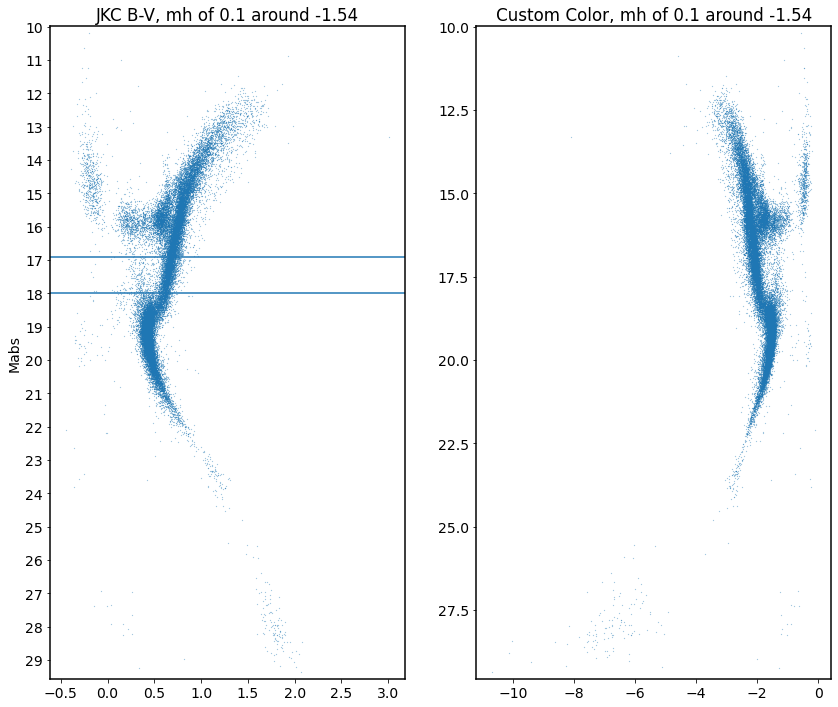

In [45]:
Ms = M.values

BRs = BV.values

plt.figure(figsize=(14,12))

plt.subplot(121)

plt.scatter(BRs,Ms,marker=".",s=0.1)

plt.ylim(max(Ms)+0.2,min(Ms)-0.2)
plt.title(f"JKC B-V, mh of {zRange} around {zPoint}")
#plt.xlabel("Color")
plt.ylabel("Mabs")
top = 16.9
bot = 18
plt.axhline(top)
plt.axhline(bot)
plt.yticks(range(10,round(max(Ms)+1)))


plt.subplot(122)

plt.ylim(max(Ms)+0.2,min(Ms)-0.2)
plt.title(f"Custom Color, mh of {zRange} around {zPoint}")


plt.scatter(color,Ms,marker=".",s=0.1)

RGB = (M>top)*(M<bot)


plt.show()

In [46]:
rgbFrame = subFrame[RGB]

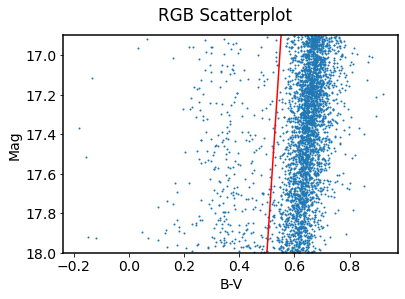

In [47]:
plt.ylim(bot,top)

plt.suptitle("RGB Scatterplot")
rgbFrame.viz.scatter("B-V","Mag",s=1)#logg

plt.plot([0.57,0.5],[16.5,18],c='r')

plt.show()


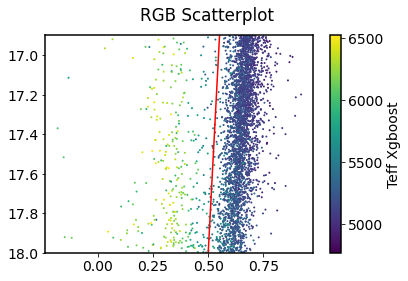

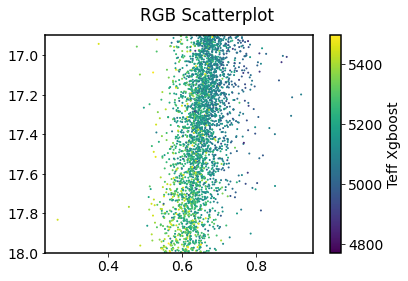

In [48]:
plt.ylim(bot,top)

plt.suptitle("RGB Scatterplot")
bv = rgbFrame["B-V"].values
mg = rgbFrame["Mag"].values
lgg = rgbFrame["logg_xgboost"].values
teff = rgbFrame["teff_xgboost"].values

#rgbFrame.viz.scatter("B-V","Mag",s=1,c="teff_xgboost")#logg
plt.scatter(bv,mg,s=1,c=teff)
cb = plt.colorbar()
cb.set_label("Teff Xgboost")


plt.plot([0.57,0.5],[16.5,18],c='r')
plt.show()

Tlim = 5.5e3

tcut = rgbFrame.teff_xgboost<Tlim



plt.ylim(bot,top)


plt.suptitle("RGB Scatterplot")
bv = rgbFrame[tcut]["B-V"].values
mg = rgbFrame[tcut]["Mag"].values
lgg = rgbFrame[tcut]["logg_xgboost"].values
teff = rgbFrame[tcut]["teff_xgboost"].values

#rgbFrame.viz.scatter("B-V","Mag",s=1,c="teff_xgboost")#logg
plt.scatter(bv,mg,s=1,c=teff)
cb = plt.colorbar()
cb.set_label("Teff Xgboost")


plt.show()

In [49]:
rgbFrame = rgbFrame[tcut]

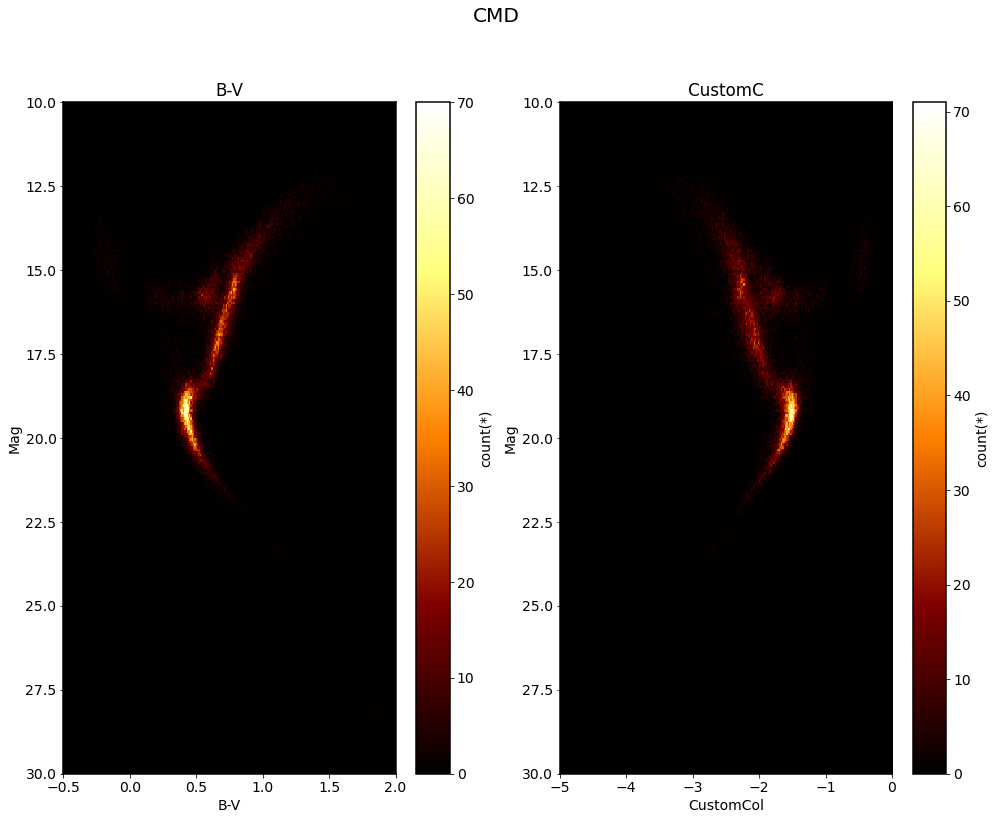

In [50]:

plt.subplot(121)
plt.title("B-V")
subFrame.viz.heatmap("B-V","Mag",title="CMD",limits=((-0.5,2),(30,10)),figsize=(14,12))
plt.subplot(122)
plt.title("CustomC")
subFrame.viz.heatmap("CustomCol","Mag",title="CMD",limits=((-5,0),(30,10)),figsize=(14,12))
plt.show()

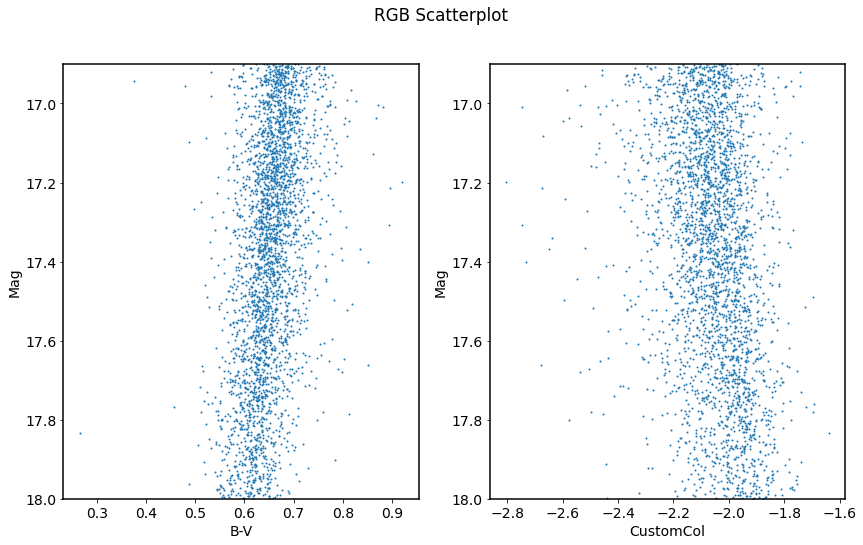

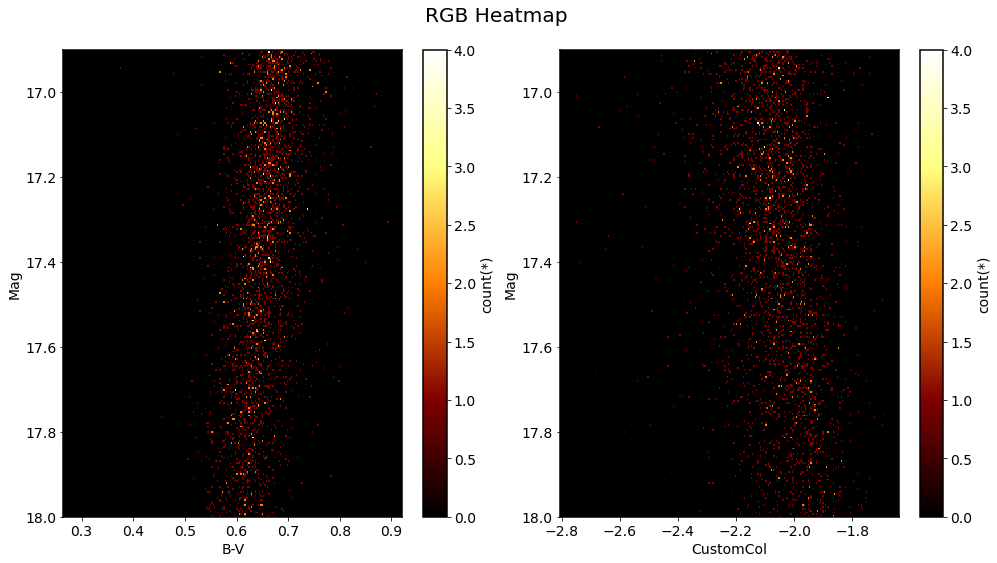

In [51]:
plt.figure(figsize=(14,8))
plt.subplot(121)

plt.ylim(bot,top)

plt.suptitle("RGB Scatterplot")
rgbFrame.viz.scatter("B-V","Mag",s=1)
plt.subplot(122)
plt.ylim(bot,top)

rgbFrame.viz.scatter("CustomCol","Mag",s=1)
plt.show()

plt.subplot(121)
plt.ylim(bot,top)
rgbFrame.viz.heatmap("B-V","Mag",figsize=(14,8),title="RGB Heatmap")

plt.subplot(122)
plt.ylim(bot,top)

rgbFrame.viz.heatmap("CustomCol","Mag")
plt.show()

# Straighten up


In [52]:
bot

18

skip


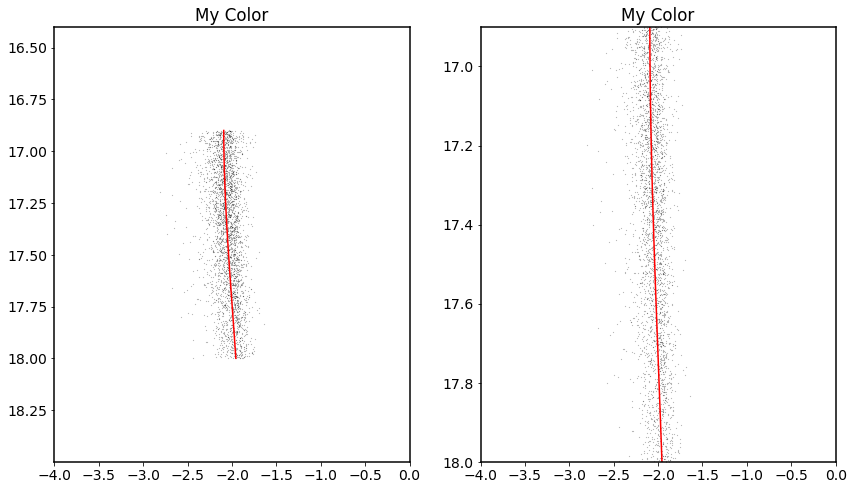

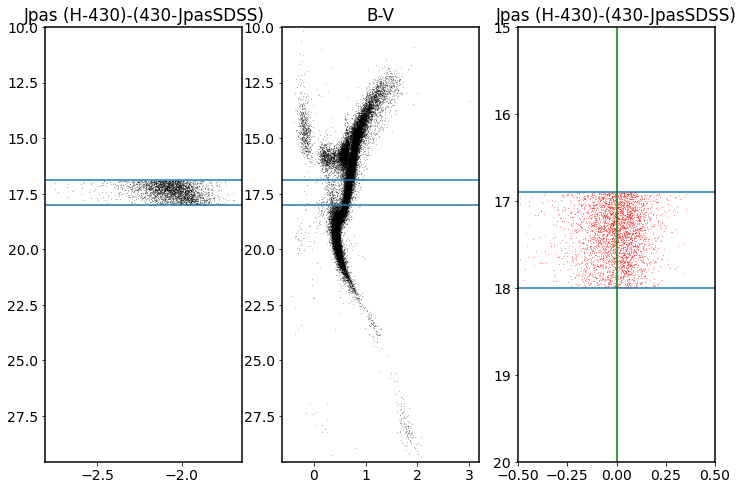

In [53]:
col = rgbFrame.CustomCol.values

point = bot
p2 =top


botm = top#11.7

nG = rgbFrame.Mag.values

bins = np.linspace(botm, point+0.1, 15)

bc =[]
mu=[]
sig=[]
isig=[]

for xmin, xmax in zip(bins[:-1], bins[1:]):
    cen = (xmax + xmin)/2
    j = (nG < xmax)*(nG >= xmin)

    if len(np.where(j==True)[0]) ==0:
        print("skip")
        continue

    cs = col[j]
    cs = cs[~np.isnan(cs)]
    mc = np.median(cs)
    std = np.std(cs)
    bc.append(cen)
    mu.append(mc)
    sig.append(std)
    
p = np.polyfit(bc,mu, 3)
f = lambda x: np.polyval(p,x)
#    f = interpolate.interp1d(bc, mu, kind='cubic', bounds_error=False, fill_value=(mu[0], mu[-1]))


plt.figure(figsize=(14,8))

plt.subplot(121)

plt.plot(col, nG, 'ko', ms=.1)

X = np.arange(botm, point, 0.05)
plt.plot(f(X),X,'r-')


plt.xlim(-4, 0)
plt.ylim(max(nG)+0.5, min(nG)-0.5)
plt.title("My Color")


plt.subplot(122)

plt.plot(col, nG, 'ko', ms=.1)

X = np.arange(botm, point, 0.05)
plt.plot(f(X),X,'r-')


plt.xlim(-4, 0)
plt.ylim(point, botm)
plt.title("My Color")



plt.show()







#'''

##################################################################################



clensedCol = col[~np.isnan(col)]
cleansedMG = nG[~np.isnan(col)]

zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

MG = cleansedMG
NC = clensedCol - f(MG)


plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
plt.plot(clensedCol, cleansedMG, 'ko', ms=.1)

#  plt.scatter(mu,bc,c='r',marker="+")

plt.ylim(max(Ms)+0.2,min(Ms)-0.2)

plt.xlim(min(clensedCol),max(clensedCol))
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')

ax2 = plt.subplot(132,sharey=ax1)
plt.plot(BRs, Ms, 'ko', ms=.1)

plt.title("B-V")
plt.axhline(point)
plt.axhline(p2)

#  plt.scatter(mu,bc,c='r',marker="+")


ax2 = plt.subplot(133)

plt.scatter(NC, MG, marker=".",s=0.1,c='r')


plt.ylim(20,15)

plt.xlim(-.5,.5)

plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')


#    plt.scatter(mu,bc,c='r',marker="+")

N=NC[zone]

plt.show()

    

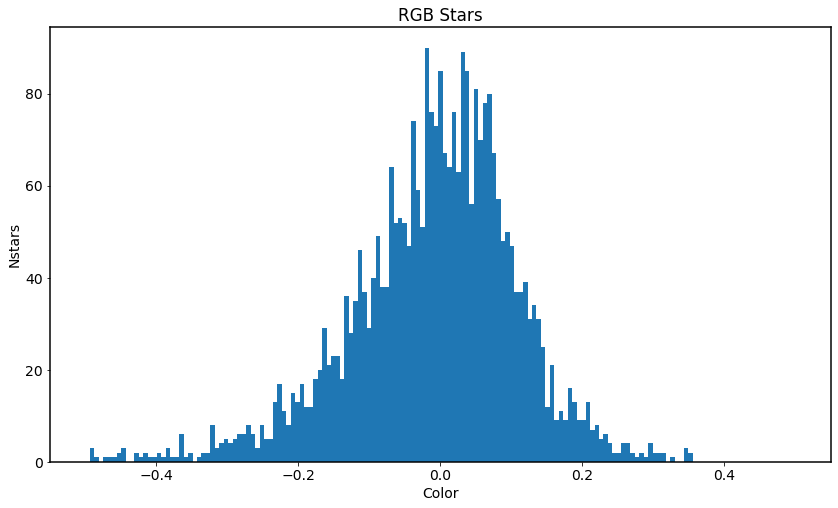

In [54]:
r= 0.5
bs = np.linspace(-r,r,160)

plt.figure(figsize=(14,8))

plt.hist(N,bs)

plt.title("RGB Stars")



plt.xlabel("Color")
plt.ylabel("Nstars")
plt.show()

In [37]:
for a in rgbFrame.get_names(                           ):
    print(a)

source_id
ra
dec
parallax
parallax_error
pmra
pmra_error
pmdec
pmdec_error
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_matched_transits
visibility_periods_used
ruwe
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_n_obs
phot_rp_mean_flux
phot_rp_mean_flux_error
phot_rp_mean_mag
radial_velocity
radial_velocity_error
rv_template_teff
rv_template_logg
rv_template_fe_h
rv_atm_param_origin
l
b
non_single_star
parallax_corr
parallax_corr_error
Gaia2_mag_C1B431
Gaia2_mag_C1B556
Gaia2_mag_C1B655
Gaia2_mag_C1B768
Gaia2_mag_C1B916
Gaia2_mag_C1M326
Gaia2_mag_C1M344
Gaia2_mag_C1M379
Gaia2_mag_C1M395
Gaia2_mag_C1M410
Gaia2_mag_C1M467
Gaia2_mag_C1M506
Gaia2_mag_C1M515
Gaia2_mag_C1M549
Gaia2_mag_C1M656
Gaia2_mag_C1M716
Gaia2_mag_C1M747
Gaia2_mag_C1M825
Gaia2_mag_C1M861
Gaia2_mag_C1M965
Gaia2_flux_C1B

In [70]:
magErrHigh = np.sqrt(rgbFrame.Jfeu**2+rgbFrame.Jfe400**2+rgbFrame.Jfe400**2)*(2.5/np.log(10))/(rgbFrame.Jfu + rgbFrame.Jf400 + rgbFrame.Jf410)
magErr430 = rgbFrame.Jfe430*(2.5/np.log(10))/(rgbFrame.Jf430)
magErrSSDS = rgbFrame.JfeSSDS*(2.5/np.log(10))/(rgbFrame.JfSSDS)

Efirst = np.sqrt(magErrHigh**2+magErr430**2)
Esecond = np.sqrt(magErr430**2+magErrSSDS**2)

fErr = np.sqrt(Efirst**2+Esecond**2)

N_error = fErr.values

# Andrea Stuff

In [71]:
N_error

array([0.0365794 , 0.04051824, 0.01416207, ..., 0.02133185, 0.0190782 ,
       0.02810707])

In [73]:
N_error = fErr.values[~np.isnan(col)]

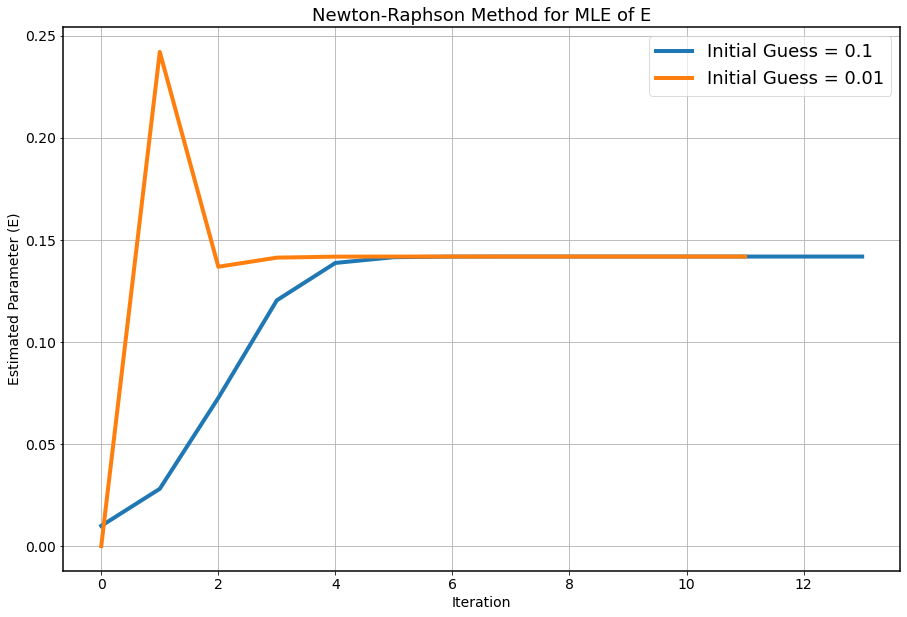

In [74]:
def log_likelihood(E, x, var):
    return -0.5*np.sum(np.log(2*np.pi*(E**2+var**2)) + ((x)**2)/(E**2+var**2))

def E_log_likelihood(E):
    return log_likelihood(E, N, N_error)

def first(E, x, var):
    return np.sum(((E*((x)**2))/((E**2+var**2))) - E/(E**2+var**2))

def newton_raphson(E_init, x, var, max_iter=10000, tol=1e-10):
    E_values = [E_init]
    
    for i in range(max_iter):
        E_current = E_values[-1]
        
        ## Compute update step using Newton-Raphson
        update_step = log_likelihood(E_current, x, var)/first(E_current, x, var)
        
        ## Update parameter value
        E_new = E_current - update_step
        E_values.append(E_new)
        
        ## Check for convergence
        if np.abs(update_step) < tol:
            break
    
    return np.array(E_values)

# Initial guesses
initial_guesses = [0.1, 0.01]

## Plotting
fig = plt.figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)
for guess in initial_guesses:
    estimated_E = newton_raphson(guess, N, N_error)**2 #CHEATING
    iterations = np.arange(len(estimated_E))
    frame.plot(iterations, estimated_E, label=f'Initial Guess = {guess}', lw=4)

frame.set_xlabel('Iteration', fontsize=14)
frame.set_ylabel('Estimated Parameter (E)', fontsize=14)
frame.set_title('Newton-Raphson Method for MLE of E', fontsize=18)
frame.legend(prop={'size': 18})
frame.grid()
plt.show()

In [75]:
estimated_E[-1]

0.14190504046406108

In [76]:
from scipy.optimize import minimize

func = lambda x: -1*log_likelihood(x, N, N_error)
res = minimize(func, 0.01, method='SLSQP', tol=1e-10)
res.x[0]

-0.1210527275415897

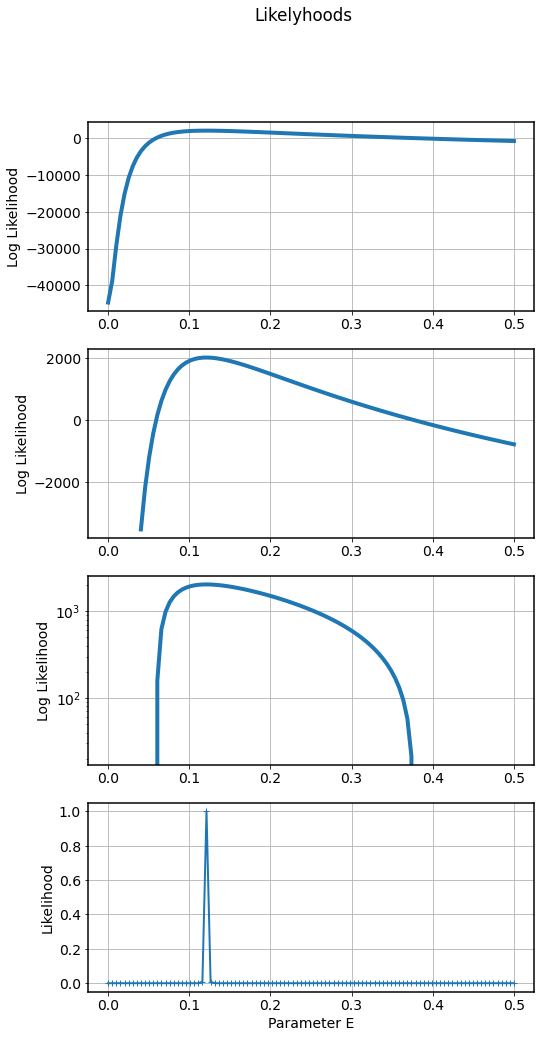

In [77]:
E_arr = np.linspace(0, 0.5, 100)
log_arr = []


fig = plt.figure(figsize=(8,16), facecolor='w')


plt.suptitle("Likelyhoods")

ax = plt.subplot(413)
for E in E_arr:
    log_arr.append(log_likelihood(E, N, N_error))
plt.plot(E_arr, log_arr, lw=4)
#plt.xlabel('Parameter E', fontsize=14)
plt.ylabel('Log Likelihood', fontsize=14)
#plt.title('Log Likelihood as a function of E', fontsize=18)
#frame.legend(prop={'size': 18})
plt.grid()


plt.yscale("log")

ax1 = plt.subplot(412,sharex=ax)
n=8


plt.plot(E_arr[n:], log_arr[n:], lw=4)
#plt.xlabel('Parameter E', fontsize=14)
plt.ylabel('Log Likelihood', fontsize=14)
#plt.title('Log Likelihood as a function of E', fontsize=18)
#frame.legend(prop={'size': 18})
plt.grid()

ax1 = plt.subplot(411,sharex=ax)
n=0




plt.plot(E_arr[n:], log_arr[n:], lw=4)
#plt.xlabel('Parameter E', fontsize=14)
plt.ylabel('Log Likelihood', fontsize=14)
#plt.title('Log Likelihood as a function of E', fontsize=18)
plt.grid()



ax1 = plt.subplot(414,sharex=ax)


trueLikelyhood= np.exp(np.array(log_arr[n:])-max(log_arr))


plt.plot(E_arr[n:],trueLikelyhood , lw=2,marker="+")
plt.xlabel('Parameter E', fontsize=14)
plt.ylabel('Likelihood', fontsize=14)
#plt.title('Likelihoold /e^(max(log(E)))', fontsize=18)
plt.grid()

#plt.yscale("log")

plt.show()




plt.show()

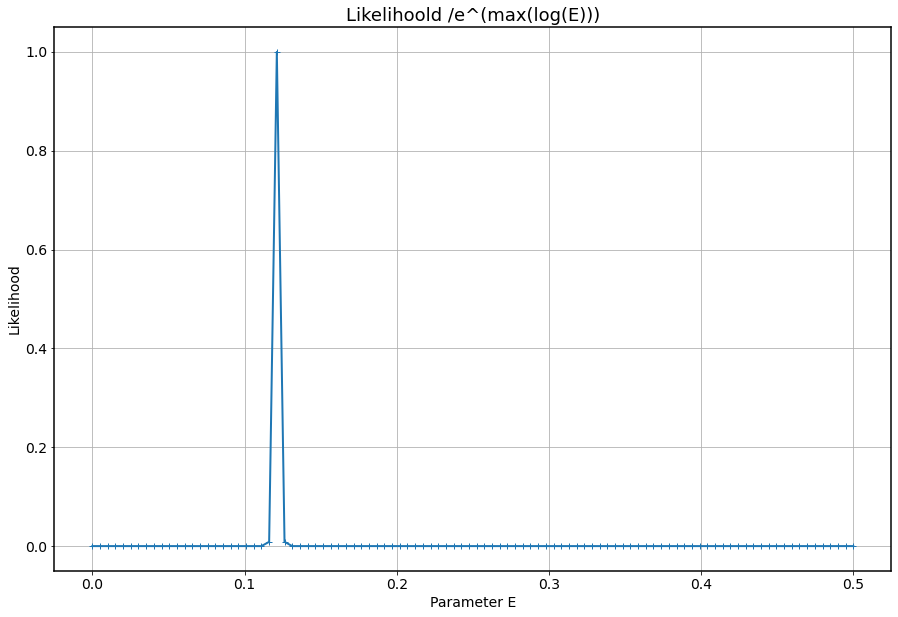

In [78]:

n=0

fig = plt.figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)

trueLikelyhood= np.exp(np.array(log_arr[n:])-max(log_arr))


frame.plot(E_arr[n:],trueLikelyhood , lw=2,marker="+")
frame.set_xlabel('Parameter E', fontsize=14)
frame.set_ylabel('Likelihood', fontsize=14)
frame.set_title('Likelihoold /e^(max(log(E)))', fontsize=18)
#frame.legend(prop={'size': 18})
frame.grid()

#plt.yscale("log")

plt.show()

In [79]:
def log_2likelihood(params, x, var):
    MU_arr, E_arr = params
    llh = np.zeros((len(MU_arr), len(E_arr)))
    for i in range(len(MU_arr)):
        for j in range(len(E_arr)):
            llh[i,j] = -0.5*np.sum(np.log(2*np.pi*(E_arr[j]**2+var**2)) + ((x-MU_arr[i])**2)/(E_arr[j]**2+var**2))
    return llh

MU_arr = np.linspace(-0.4, 0.4, 100)
parameters = [MU_arr, E_arr]

llh = log_2likelihood(parameters, N, N_error)

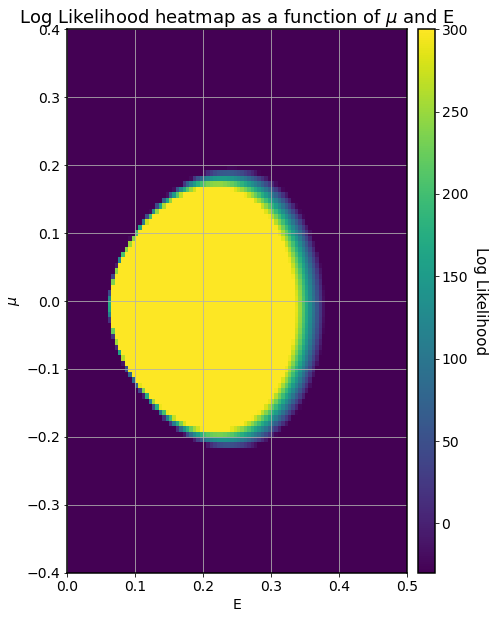

In [80]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig = plt.figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)

divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

ax1 = frame.imshow(llh, origin="lower", extent=[0,0.5,-0.4,0.4], interpolation=None, vmin=-30, vmax=300)
cbar = fig.colorbar(ax1, cax=colbarframe)
cbar.set_label(r"Log Likelihood", rotation=270, fontsize=15, labelpad=20)
frame.set_xlabel('E', fontsize=14)
frame.set_ylabel(r'$\mu$', fontsize=14)
frame.set_title(r'Log Likelihood heatmap as a function of $\mu$ and E', fontsize=18)
#frame.legend(prop={'size': 18})
frame.grid()
plt.show()

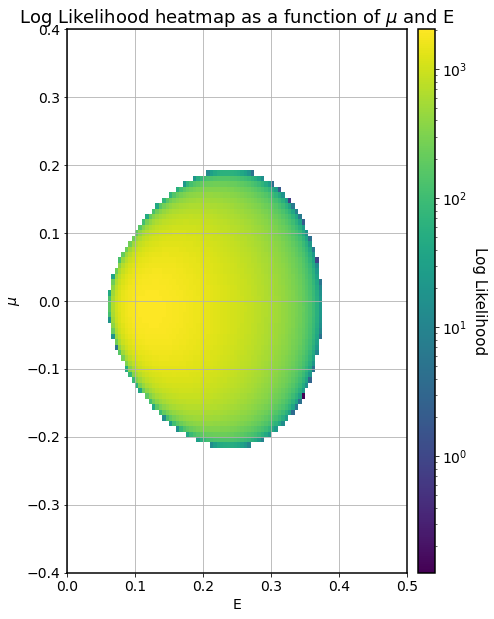

In [81]:
fig = plt.figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)

divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

ax1 = frame.imshow(llh, origin="lower", extent=[0,0.5,-0.4,0.4], interpolation=None,norm="log")
cbar = fig.colorbar(ax1, cax=colbarframe)
cbar.set_label(r"Log Likelihood", rotation=270, fontsize=15, labelpad=20)
frame.set_xlabel('E', fontsize=14)
frame.set_ylabel(r'$\mu$', fontsize=14)
frame.set_title(r'Log Likelihood heatmap as a function of $\mu$ and E', fontsize=18)
#frame.legend(prop={'size': 18})
frame.grid()
plt.show()

In [82]:
index_max_llh = np.argwhere(llh == np.max(llh))[0]
max_E = E_arr[index_max_llh[1]]
max_MU = MU_arr[index_max_llh[0]]
print(f"Expected dispersion E = {max_E:.3f}, and mean MU = {max_MU:.3f}")

Expected dispersion E = 0.121, and mean MU = -0.012


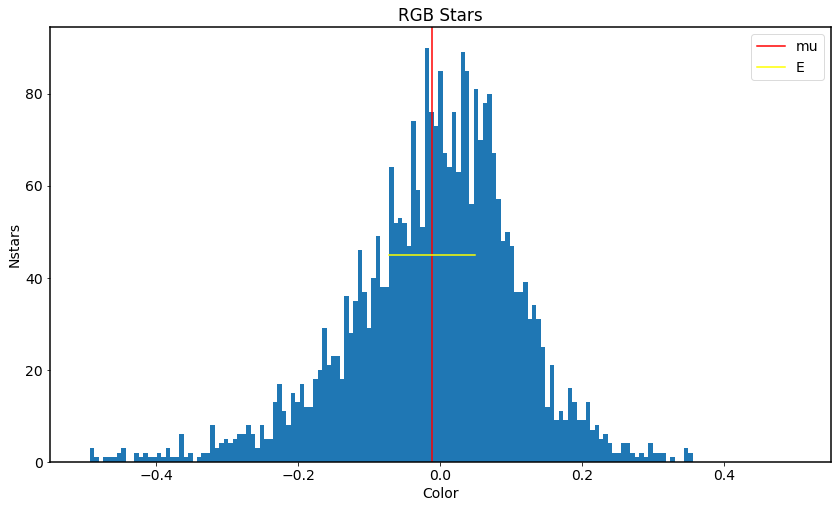

In [83]:
r= 0.5
bs = np.linspace(-r,r,160)

plt.figure(figsize=(14,8))

his = plt.hist(N,bs)

max_h = max(his[0])

plt.axvline(max_MU,c='r',label="mu")

plt.plot([max_MU-0.5*max_E,max_MU+0.5*max_E],[max_h/2,max_h/2],c='yellow',label="E")


plt.title("RGB Stars")


plt.legend()
plt.xlabel("Color")
plt.ylabel("Nstars")
plt.show()